In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# IMPORT DATA
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AV_NLP/Project - Hate Speech Classification/train.csv', encoding='latin1')

In [50]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [0]:
d1=data[data['label']==1]
d0=data[data['label']==0]

In [0]:
d1=d1.sample(n=2000)
d0=d0.sample(n=2000)

In [0]:
data=pd.concat([d0,d1],ignore_index=True)

In [54]:
data.shape

(4000, 3)

In [55]:
data.label.value_counts()

1    2000
0    2000
Name: label, dtype: int64

In [56]:
for tweet in data['tweet'][:5]:
    print("\n\n",tweet)



 it's a jungle out there Ã°ÂÂÂÃ°ÂÂÂ #fridayfun #jungle #imready   #fridaynight 


 back to my childhood with colajet @user @user #foodporn   


   #heal with the #lawofattraction #loa  !!  #altwaystoheal  #healthy     #wellness !! 


 happy pooch  #tlpetservices #dog #dogs #pet #pets #dogsoftwitter #dogwalking #goldenretriever   #pooch #cute 


  @user @user ji #te3n #gofoe3n #awesome #movie #loved every second of it   to take 118 chennai fans of yoursÃ°ÂÂÂÃ°ÂÂÂ 


In [57]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text):
    #converting to lowercase
    newString = text.lower()
    #removing links
    newString = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', newString) 
    #removing text inside ()
    newString = re.sub(r'\([^)]*\)', '', newString)
    #removing text inside []
    newString = re.sub(r'\{[^)]*\}', '', newString)
    #fetching alphabetic characters
    newString = re.sub("[^a-zA-Z]", " ", newString)
    #removing stop words
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        #removing short words
        if len(i)>2:                                                 
            long_words.append(i) 
    return (" ".join(long_words)).strip()

In [59]:
text1 = data['tweet'][3]
clean_text1 = text_cleaner(text1)
print("Before cleaning:\n",text1)
print("After cleaning:\n",clean_text1)

Before cleaning:
 happy pooch  #tlpetservices #dog #dogs #pet #pets #dogsoftwitter #dogwalking #goldenretriever   #pooch #cute 
After cleaning:
 happy pooch tlpetservices dog dogs pet pets dogsoftwitter dogwalking goldenretriever pooch cute


In [0]:
cleaned_text=[]
for i in data['tweet']:
    cleaned_text.append(text_cleaner(i))

In [62]:
cleaned_text[0:5]

['jungle fridayfun jungle imready fridaynight',
 'back childhood colajet user user foodporn',
 'heal lawofattraction loa altwaystoheal healthy wellness',
 'happy pooch tlpetservices dog dogs pet pets dogsoftwitter dogwalking goldenretriever pooch cute',
 'user user gofoe awesome movie loved every second take chennai fans']

In [63]:
data['label'].value_counts()

1    2000
0    2000
Name: label, dtype: int64

In [0]:
data['cleaned_text']=cleaned_text

In [65]:
type(data.cleaned_text)

pandas.core.series.Series

In [66]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(data.cleaned_text.str)

user         2642
amp           384
love          203
like          202
trump         199
             ... 
poray           1
oiler           1
vettel          1
jemele          1
microsoft       1
Length: 9405, dtype: int64

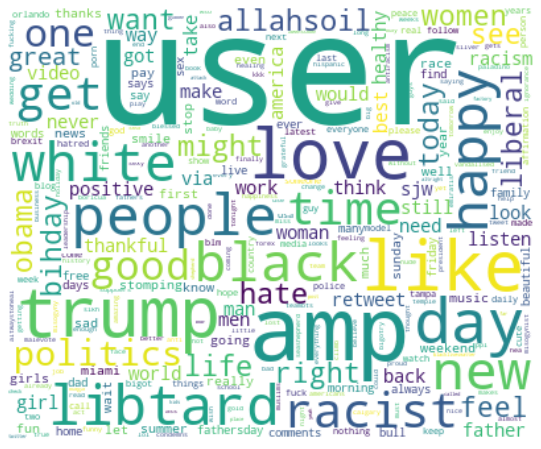

In [67]:
#Generate a word cloud

#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=500, 
               background_color='white').generate_from_frequencies(gen_freq(data.cleaned_text.str))

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [68]:
print('10 random headlines which are hateful: \n')
cl = data.loc[data.label == 1, ['cleaned_text']].sample(10).values
for c in cl:
    print(c[0])

10 random headlines which are hateful: 

pre ordered sounds really great book
smaller hands show barry probably lied knicks game sucked golf
racism front center trumpworld kkk folk open kkk trumpworld
user might libtard libtard sjw liberal politics
user homicides rose big cities year wall street journal povey inequity illegalguns
user user coming powerhungrytraitors hereticfoundation
user feminismiscancer feminismisterrorism feminismmuktbharat malevote ignored user
user luicalibre video close fiends dad died
user user liz treacy user condone councillor mark hackett islamophobia user
user cuomo paladino racist ugly comments obamas embarrass new yorkers politics


In [69]:
print('10 random headlines which are not hateful: \n')
cl = data.loc[data.label == 0, ['cleaned_text']].sample(10).values
for c in cl:
    print(c[0])

10 random headlines which are not hateful: 

watch gleb savchenko sharna burgess rumba take care christina sings beautiful dance gone
user user user way missing wide open shots throwing rock away
user wish could fun guys love bitten
user fathers day user user user user user lasvegas fathersday
look lads faces mean business joshuabreazeale time week happening youready
africanchildday hope healthy blessed wish meet ans help one day truly love user
hey user love music really performing murderous azerbaijan dictatorship
fridayfeeling winery today full bmw conveible amp valdobbiadene prosecco
secret work identify enjoy working focus getting clients
smoke good love like like like likeforlike instalike instafollow


user 2642
amp 384
love 203
like 202
trump 199
day 164
people 138
libtard 131
new 127
white 126
happy 125
black 123
racist 97
time 93
good 90
politics 87
allahsoil 85
hate 82
life 80
today 75


Text(0.5, 1.0, 'Top 20 words in headlines after removing stop words')

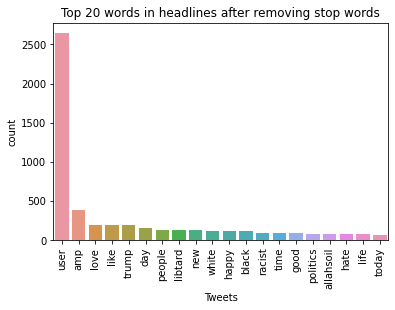

In [70]:
#The distribution of top unigrams after removing stop words
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['cleaned_text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Tweets' , 'count'])

x=pd.DataFrame(df2.groupby('Tweets').sum()['count'].sort_values(ascending=False))
import seaborn as sns
sns.barplot(x=x.index, y=x['count'])
plt.xticks(rotation=90)
plt.title('Top 20 words in headlines after removing stop words')

user user user 245
libtard libtard sjw 63
libtard sjw liberal 63
sjw liberal politics 63
amp feel like 43
stomping listen retweet 40
feel like stomping 39
like stomping listen 38
user libtard libtard 34
black amp feel 29
retweet tampa miami 29
model love time 24
listen retweet tampa 24
listen retweet boricua 23
sikh temple vandalised 22
temple vandalised calgary 22
vandalised calgary wso 22
calgary wso condemns 22
wso condemns act 22
blog silver gold 19


Text(0.5, 1.0, 'Top 20 trigrams in headlines after removing stop words')

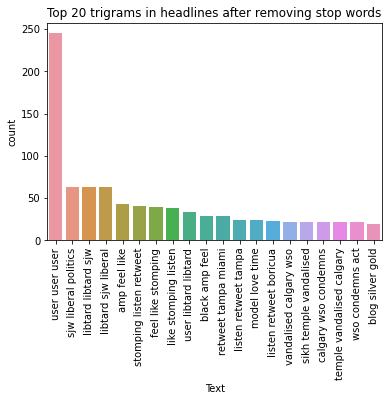

In [71]:
# The distribution of Top trigrams after removing stop words

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(data['cleaned_text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
x=pd.DataFrame(df6.groupby('Text').sum()['count'].sort_values(ascending=False))
import seaborn as sns
sns.barplot(x=x.index, y=x['count'])
plt.xticks(rotation=90)
plt.title('Top 20 trigrams in headlines after removing stop words')

In [0]:
#Remove duplicate words
def remov_duplicates(input): 
  
    # split input string separated by space 
    input = input.split(" ") 
  
    # joins two adjacent elements in iterable way 
    for i in range(0, len(input)): 
        input[i] = "".join(input[i]) 
  
    # now create dictionary using counter method 
    # which will have strings as key and their  
    # frequencies as value 
    UniqW = Counter(input) 
  
    # joins two adjacent elements in iterable way 
    return(" ".join(UniqW.keys()))

In [0]:
cleaned_text1=[]
for i in data['cleaned_text']:
    cleaned_text1.append(remov_duplicates(i))

In [132]:
cleaned_text1[0:10]

['jungle fridayfun imready fridaynight',
 'back childhood colajet user foodporn',
 'heal lawofattraction loa altwaystoheal healthy wellness',
 'happy pooch tlpetservices dog dogs pet pets dogsoftwitter dogwalking goldenretriever cute',
 'user gofoe awesome movie loved every second take chennai fans',
 'biggest worry life right chacos wear tshi put amp',
 'hardcore forums beach adult',
 'cox died wrong place time nothing politics rip thoughts family',
 'sad hear news user passed away ripchristinagrimmie',
 'setting wales games development show wait gamedev']

libtard sjw liberal 63
sjw liberal politics 63
amp feel like 43
stomping listen retweet 40
feel like stomping 39
like stomping listen 38
user libtard sjw 34
black amp feel 29
retweet tampa miami 29
model love time 24
listen retweet tampa 24
listen retweet boricua 23
sikh temple vandalised 22
temple vandalised calgary 22
vandalised calgary wso 22
calgary wso condemns 22
wso condemns act 22
blog silver gold 19
silver gold forex 19
sea shepherd suppoers 17


Text(0.5, 1.0, 'Top 20 trigrams in headlines after removing stop words')

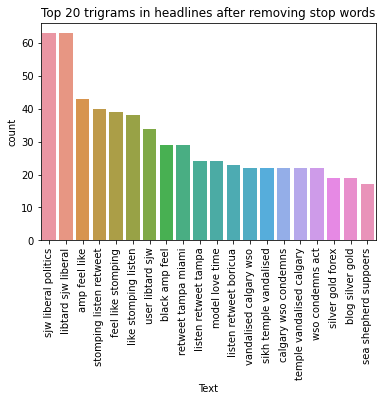

In [133]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(cleaned_text1, 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
x=pd.DataFrame(df6.groupby('Text').sum()['count'].sort_values(ascending=False))
import seaborn as sns
sns.barplot(x=x.index, y=x['count'])
plt.xticks(rotation=90)
plt.title('Top 20 trigrams in headlines after removing stop words')

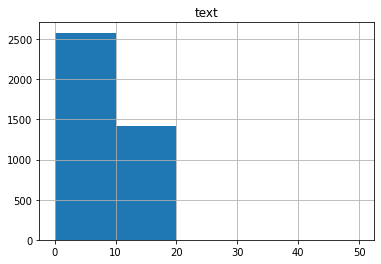

In [134]:
import matplotlib.pyplot as plt

text_word_count = []

#populate the lists with sentence lengths
for i in data['cleaned_text']:
      text_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count})

length_df.hist(bins = 5, range=(0,50))
plt.show()

In [0]:
maxlen=10

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, TimeDistributed, Reshape,Dot
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from keras.initializers import Constant

In [0]:
max_features = 10000
maxlen = 10
embedding_size = 200

data['cleaned_text']= cleaned_text1

In [0]:
train = data.sample(frac=0.75, random_state=99)
test = data.loc[~data.index.isin(train.index), :]

In [143]:
train.head()

,id,label,tweet,cleaned_text
3796,7384,1,@user 2016 - the year in,user year
3906,4478,1,#trump hooked the healand by validating their ...,trump hooked healand validating adultery inces...
1030,4712,0,@user people actually believe the shit spewing...,user people actually believe shit spewing mouth
1813,17413,0,"now playing : gary girouard - "" miracles"" on...",playing gary girouard miracles music song
1104,12085,0,great insights on trusted professions in emea ...,great insights trusted professions emea growth...


In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train['cleaned_text'])

In [145]:
X = tokenizer.texts_to_sequences(train['cleaned_text'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(train['label'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 3000
[ 0  0  0  0  0  0  0  0  1 80]
Number of Labels:  3000
1


In [146]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 7889 unique tokens.


In [0]:
glove_path =  '/content/drive/My Drive/Colab Notebooks/AIML/NLP/Week 6 - NLP Project/'
glove_file = glove_path + "glove.6B.zip"

In [0]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [149]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

print('Found %s word vectors.' % len(embeddings))

Found 400000 word vectors.


In [0]:
embedding_dim = 200

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((len(word_index)+1, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

In [151]:
model = Sequential()
model.add(Embedding(len(word_index)+1,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,
                    trainable=True))

model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(32, recurrent_dropout=0.1,return_sequences=True)))
model.add(Bidirectional(LSTM(16, recurrent_dropout=0.1)))
model.add(Dropout(0.25))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 200)           1578000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 10, 200)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 64)            59648     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                10368     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [152]:
epochs = 10
batch_size = 128

history = model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)

Epoch 1/10
19/19 [==============================] - 4s 204ms/step - loss: 0.6494 - accuracy: 0.6875 - val_loss: 0.5612 - val_accuracy: 0.7933
Epoch 2/10
19/19 [==============================] - 3s 153ms/step - loss: 0.4593 - accuracy: 0.8208 - val_loss: 0.4322 - val_accuracy: 0.8300
Epoch 3/10
19/19 [==============================] - 3s 162ms/step - loss: 0.3498 - accuracy: 0.8629 - val_loss: 0.3749 - val_accuracy: 0.8583
Epoch 4/10
19/19 [==============================] - 3s 152ms/step - loss: 0.2757 - accuracy: 0.8942 - val_loss: 0.3502 - val_accuracy: 0.8633
Epoch 5/10
19/19 [==============================] - 3s 153ms/step - loss: 0.2161 - accuracy: 0.9208 - val_loss: 0.3823 - val_accuracy: 0.8467
Epoch 6/10
19/19 [==============================] - 3s 152ms/step - loss: 0.1711 - accuracy: 0.9400 - val_loss: 0.3901 - val_accuracy: 0.8633
Epoch 7/10
19/19 [==============================] - 3s 150ms/step - loss: 0.1265 - accuracy: 0.9546 - val_loss: 0.4429 - val_accuracy: 0.8483
Epoch 

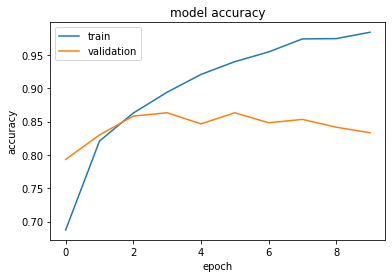

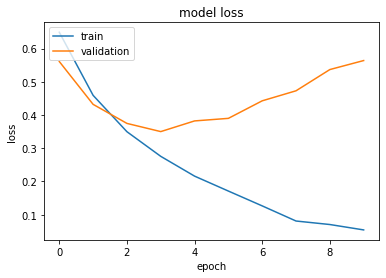

In [153]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
X_test = tokenizer.texts_to_sequences(test['cleaned_text'])
X_test = pad_sequences(X_test, maxlen = maxlen)
y_test = np.asarray(test['label'])

In [0]:
y_hat = model.predict(X_test)
y_pred=np.round(y_hat)

In [157]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_pred,y_test))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       482
         1.0       0.86      0.86      0.86       518

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000

0.856


In [158]:
#Import the Test 
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AV_NLP/Project - Hate Speech Classification/test_tweets.csv', encoding='latin1')
test.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [0]:
cleaned_test_text=[]
for i in test['tweet']:
    cleaned_test_text.append(text_cleaner(i))

test['cleaned_text']=cleaned_test_text

In [0]:
cleaned_text1=[]
for i in test['cleaned_text']:
    cleaned_text1.append(remov_duplicates(i))

test['cleaned_text']=cleaned_text1

In [163]:
test.head()

,id,tweet,cleaned_text
0,7921,I hate the new #iphone upgrade. Won't let me d...,hate new iphone upgrade let download apps ugh ...
1,7922,currently shitting my fucking pants. #apple #i...,currently shitting fucking pants apple imac ca...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",like puts roms ipad possible yes block screen
3,7924,My ipod is officially dead. I lost all my pict...,ipod officially dead lost pictures videos sos ...
4,7925,Been fighting iTunes all night! I only want th...,fighting itunes night want music paid


In [0]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(test['cleaned_text'])

In [212]:
X = tokenizer.texts_to_sequences(test['cleaned_text'])
X = pad_sequences(X, maxlen = maxlen)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 6623 unique tokens.


In [0]:
embedding_dim = 200

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((len(word_index)+1, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

In [214]:
embedding_matrix.shape

(6624, 200)

In [0]:
test_pred=model.predict_classes((X))

In [0]:
y=[]
for i in range(0,len(test_pred)):
  y.append(one(test_pred[i]))

In [217]:
y[0:5]

[0, 0, 1, 1, 0]

In [0]:
id=np.arange(7921,9874)
label=y


Submission_array=np.array([id,label])

Submission=pd.DataFrame(Submission_array).T
Submission.rename(columns={0: 'id', 1: 'label'}, inplace=True)


from google.colab import files
Submission.to_csv('Bi_LSTM_v1.csv', index=False) 
files.download('Bi_LSTM_v1.csv')

In [0]:
#Pred by conversion of test to glove embeddings

In [218]:
pred=model.predict(embedding_matrix)

InvalidArgumentError: ignored